In [5]:
!pip install mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 640.0 kB/s eta 0:00:03
   --------- ------------------------------ 0.3/1.4 MB 3.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.4 MB 6.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.4 MB 6.5 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.1 MB/s eta 0:00:00


In [75]:
# load data
with open('groceries.txt', 'r') as file:
    transactions = [line.strip().split(',') for line in file]
    
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()
len(df)

9835

In [89]:
columns_list = df.columns.tolist()
print(columns_list)
len(columns_list)

['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'baby food', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen veget

171

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
bottled water            1087
root vegetables          1072
tropical fruit           1032
shopping bags             969
sausage                   924
pastry                    875
citrus fruit              814
bottled beer              792
newspapers                785
canned beer               764
pip fruit                 744
fruit/vegetable juice     711
whipped/sour cream        705
brown bread               638
domestic eggs             624
dtype: int64


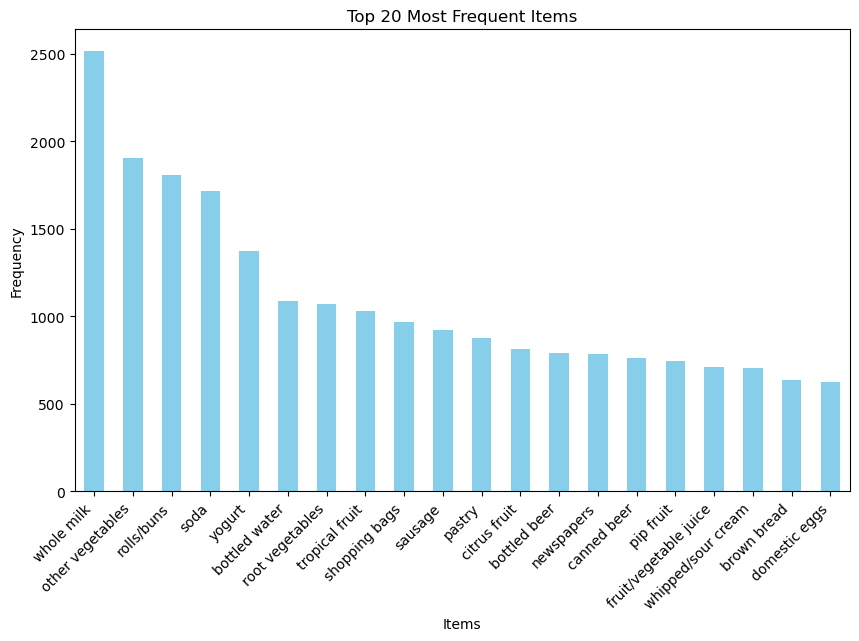

In [21]:
import matplotlib.pyplot as plt

# find frequencies
item_frequencies = df.sum().sort_values(ascending=False)

# top 20
print(item_frequencies.head(20))

plt.figure(figsize=(10, 6))
item_frequencies.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Items')
plt.ylabel('Frequency')
plt.xlabel('Items')
plt.xticks(rotation=45, ha='right')
plt.show()

sound storage medium      1
baby food                 1
preservation products     2
kitchen utensil           4
bags                      4
frozen chicken            6
baby cosmetics            6
toilet cleaner            7
make up remover           8
salad dressing            8
whisky                    8
liqueur                   9
rubbing alcohol          10
hair spray               11
frozen fruits            12
cream                    13
decalcifier              15
honey                    15
roll products            15
organic products         16
dtype: int64


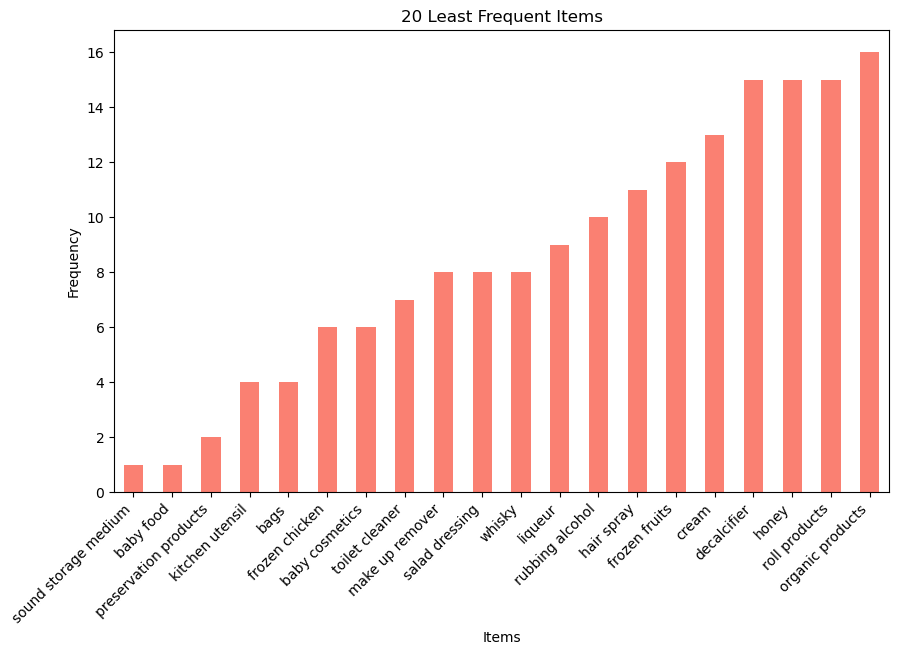

In [23]:
#least frequent
least_frequent_items = item_frequencies.sort_values(ascending=True)
print(least_frequent_items.head(20))

plt.figure(figsize=(10, 6))
least_frequent_items.head(20).plot(kind='bar', color='salmon')
plt.title('20 Least Frequent Items')
plt.ylabel('Frequency')
plt.xlabel('Items')
plt.xticks(rotation=45, ha='right')
plt.show()

In [69]:
#support
min_support = 0.005
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

# confidence
min_confidence = 0.2
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# lift
min_lift = 2
filtered_rules = rules[rules['lift'] >= min_lift]

#other rules
single_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x) == 1)]
singles = single_rules[single_rules['consequents'].apply(lambda x: len(x) == 1)]

print(singles.head())
len(singles)

        antecedents           consequents  antecedent support  \
4   (baking powder)    (other vegetables)            0.017692   
5   (baking powder)          (whole milk)            0.017692   
8            (beef)     (root vegetables)            0.052466   
14        (berries)  (whipped/sour cream)            0.033249   
16        (berries)              (yogurt)            0.033249   

    consequent support   support  confidence      lift  leverage  conviction  \
4             0.193493  0.007321    0.413793  2.138547  0.003898    1.375807   
5             0.255516  0.009253    0.522989  2.046793  0.004732    1.560725   
8             0.108998  0.017387    0.331395  3.040367  0.011668    1.332628   
14            0.071683  0.009049    0.272171  3.796886  0.006666    1.275461   
16            0.139502  0.010574    0.318043  2.279848  0.005936    1.261807   

    zhangs_metric  
4        0.541982  
5        0.520642  
8        0.708251  
14       0.761960  
16       0.580681  


40

In [71]:
singles.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
125,(herbs),(root vegetables),0.016268,0.108998,0.007016,0.431250,3.956477,0.005243,1.566596,0.759608
14,(berries),(whipped/sour cream),0.033249,0.071683,0.009049,0.272171,3.796886,0.006666,1.275461,0.761960
231,(sliced cheese),(sausage),0.024504,0.093950,0.007016,0.286307,3.047435,0.004714,1.269523,0.688732
8,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
166,(onions),(root vegetables),0.031012,0.108998,0.009456,0.304918,2.797452,0.006076,1.281865,0.663096
108,(grapes),(tropical fruit),0.022369,0.104931,0.006101,0.272727,2.599101,0.003753,1.230719,0.629329
201,(pip fruit),(tropical fruit),0.075648,0.104931,0.020437,0.270161,2.574648,0.012499,1.226392,0.661650
249,(soft cheese),(yogurt),0.017082,0.139502,0.005999,0.351190,2.517462,0.003616,1.326272,0.613250
124,(herbs),(other vegetables),0.016268,0.193493,0.007728,0.475000,2.454874,0.004580,1.536205,0.602448
164,(onions),(other vegetables),0.031012,0.193493,0.014235,0.459016,2.372268,0.008234,1.490817,0.596976


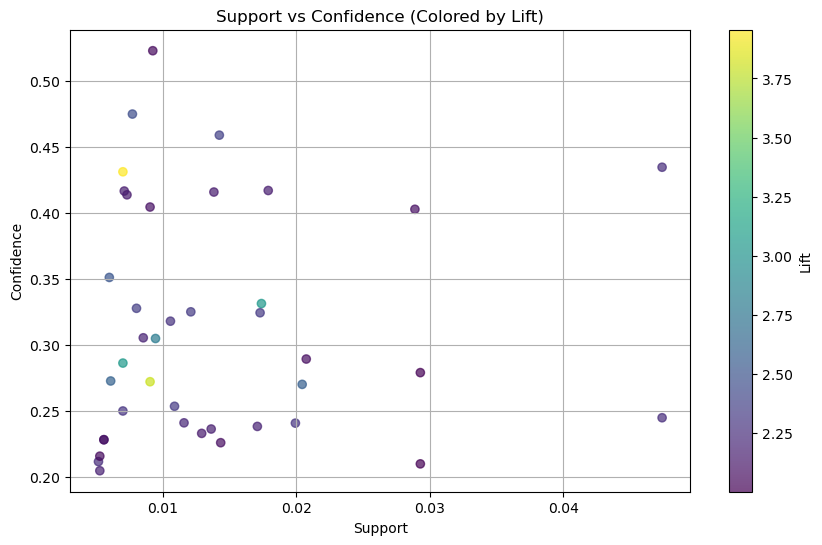

In [97]:
import matplotlib.pyplot as plt

# Scatter plot for Support vs. Confidence, colored by Lift
plt.figure(figsize=(10, 6))
plt.scatter(singles['support'], 
            singles['confidence'], 
            c=singles['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.title('Support vs Confidence (Colored by Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

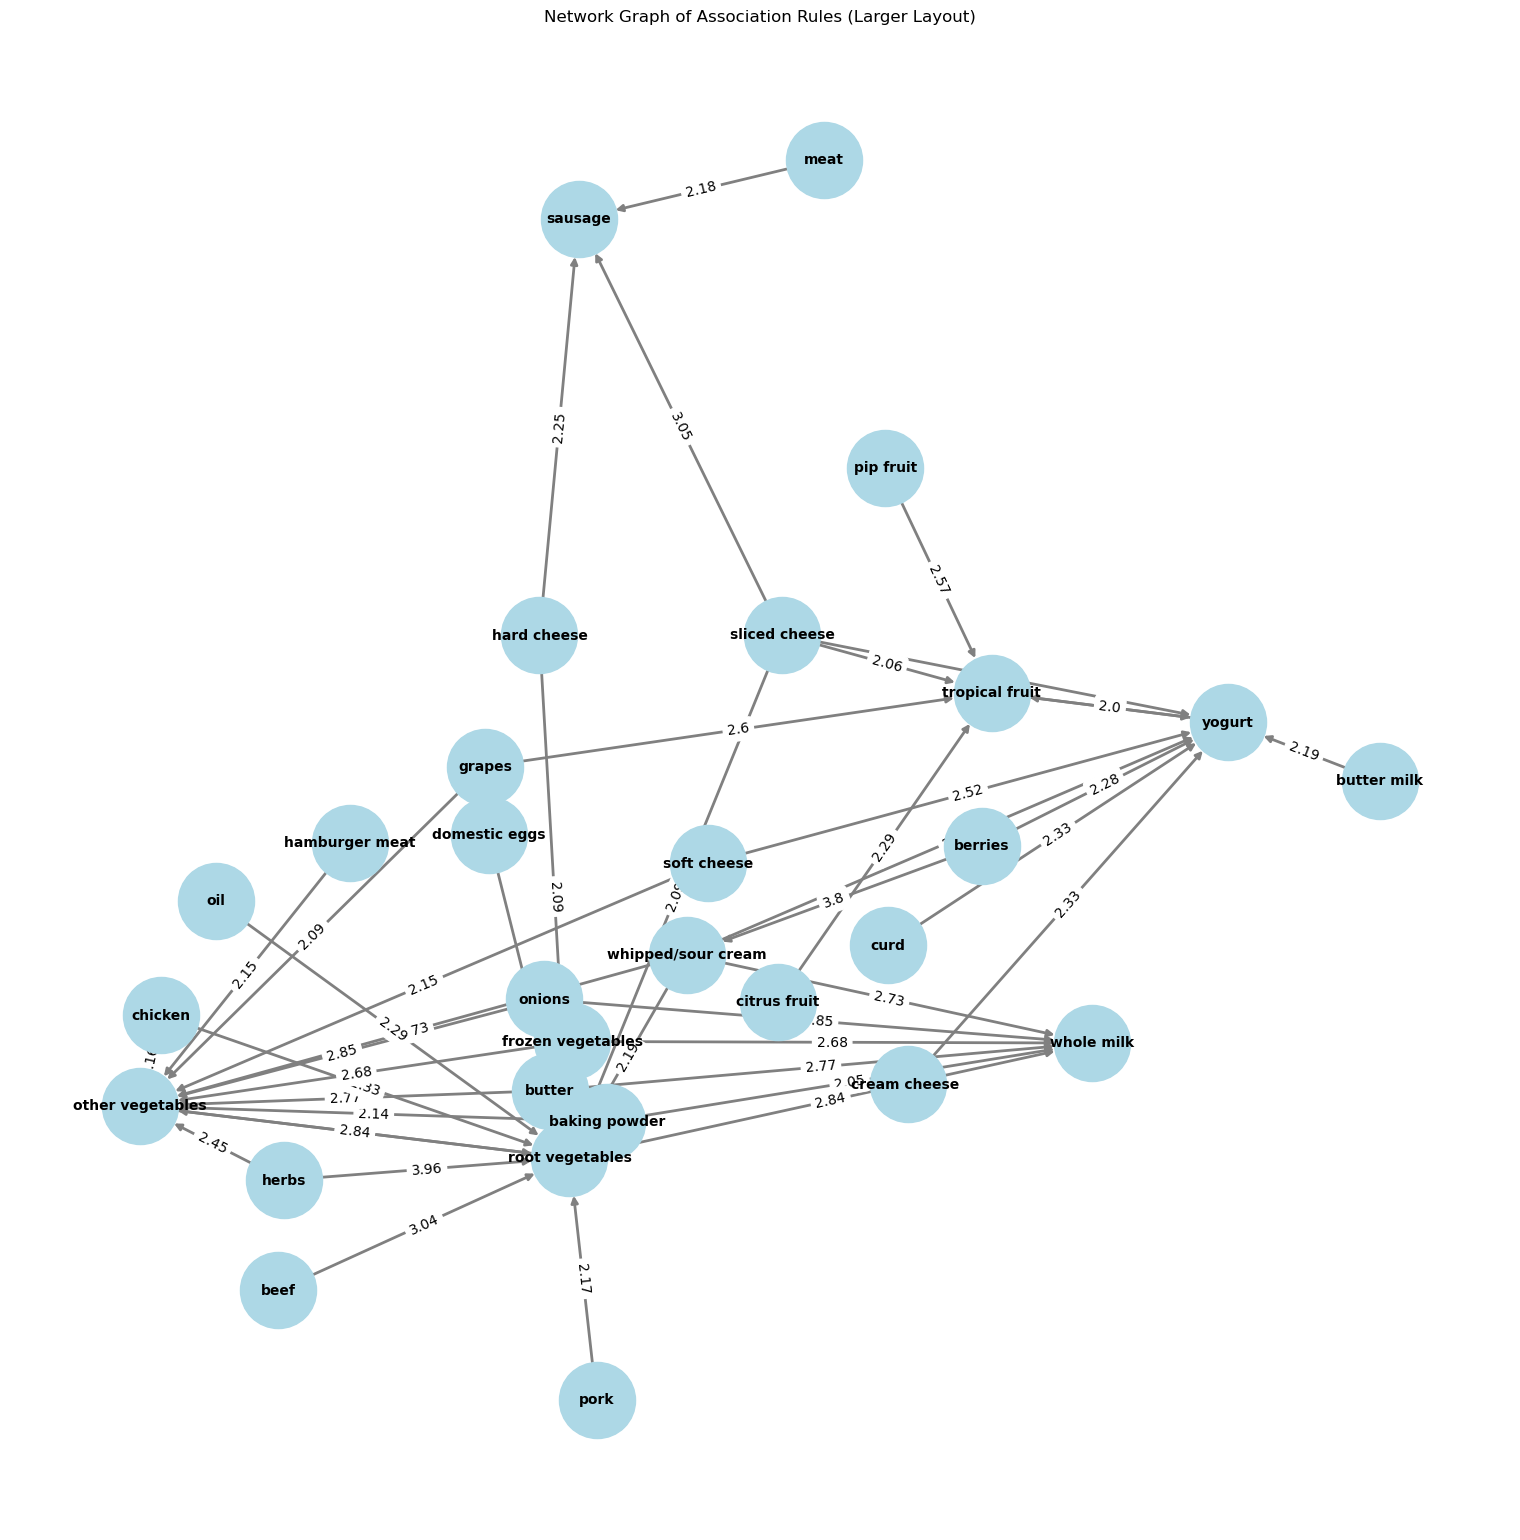

In [99]:
import networkx as nx
import matplotlib.pyplot as plt


# Create a new graph with filtered rules
G_filtered = nx.DiGraph()

for _, rule in singles.iterrows():
    for antecedent in rule['antecedents']:
        for consequent in rule['consequents']:
            G_filtered.add_edge(antecedent, consequent, weight=round(rule['lift'], 2))

# Increase the figure size to make the graph less cluttered
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', 
        font_size=10, font_weight='bold', edge_color='gray', width=2)

# Adding edge labels with rounded Lift values
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title('Network Graph of Association Rules (Larger Layout)')
plt.show()

In [87]:
# Now I want to look at less frequent associations
from mlxtend.frequent_patterns import apriori, association_rules

#low support
frequent_itemsets = apriori(df, min_support=0.002, max_len=None, use_colnames=True)

# confidence
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# support and lift filters
filtered_rules = rules[(rules['support'] <= 0.005) & (rules['lift'] >= 3)]

# single items
single_antecedent_rules = filtered_rules[filtered_rules['antecedents'].apply(lambda x: len(x) == 1)]
singles2 = single_antecedent_rules[single_antecedent_rules['consequents'].apply(lambda x: len(x) == 1)]

len(singles2)
singles2.sort_values(by = 'lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640,0.919834
140,(popcorn),(salty snack),0.007219,0.037824,0.002237,0.309859,8.192110,0.001964,1.394173,0.884315
11,(liquor),(bottled beer),0.011083,0.080529,0.004677,0.422018,5.240594,0.003785,1.590831,0.818250
146,(rice),(root vegetables),0.007626,0.108998,0.003152,0.413333,3.792102,0.002321,1.518753,0.741952
173,(turkey),(tropical fruit),0.008134,0.104931,0.002644,0.325000,3.097263,0.001790,1.326028,0.682687
